## Explore and Clean dataset

###### Load the dataset and understand its structure.
###### Check for missing values and handle them appropriately.
###### Explore the distribution of numerical variables.
###### Check for outliers and decide whether to remove or transform them.

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
data = pd.read_csv('Real estate.csv')

In [3]:
def standard_scaling(X, num_features):
    for feature in num_features:
        X[feature] = (X[feature] - X[feature].mean()) / X[feature].std()
    return X    

In [4]:
num_features = data.select_dtypes(include=['int64', 'float64']).columns
# cat_features = X.select_dtypes(include=['object']).columns

data[num_features] = data[num_features].fillna(data[num_features].mean())
# X[cat_features] = X[cat_features].fillna(X[cat_features].mode().iloc[0])

# another technique for impute missed value :
# data.fillna(data.mean(), inplace=True)
# data['cat_features'].fillna(data['cat_features'].mode()[0], inplace=True)

In [5]:
print(data.describe())

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  

<Axes: >

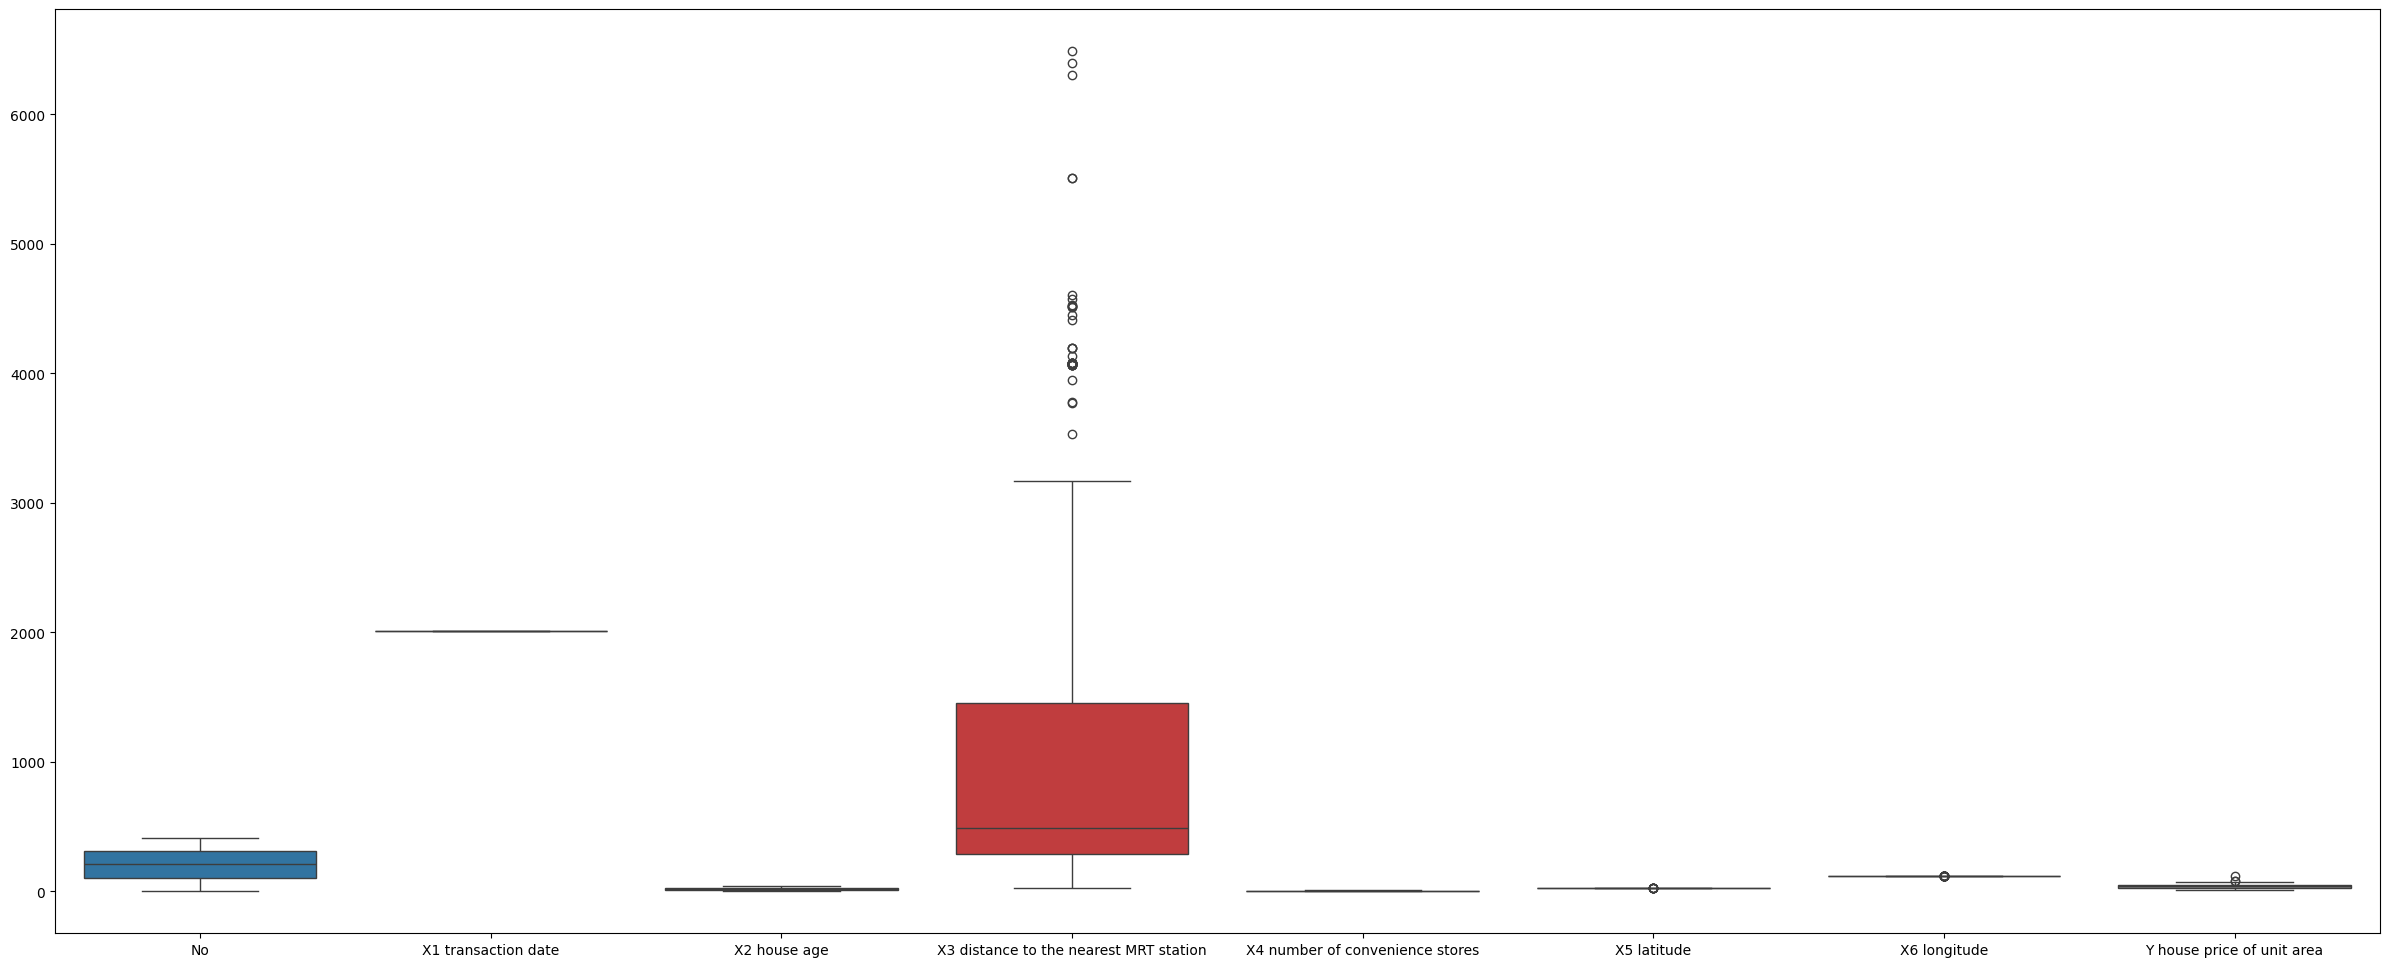

In [6]:
plt.figure(figsize=(30, 12))
sns.boxplot(data)

In [7]:
for feature in num_features:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[feature] = data[feature].apply(lambda x:upper_bound if x>upper_bound else( lower_bound if x<lower_bound else x))
    
X = data.drop('Y house price of unit area', axis=1)
y = data['Y house price of unit area']
num_features = X.select_dtypes(include=['int64', 'float64']).columns
# num_features = num_features.delete(num_features.get_loc('Y house price of unit area'))
X = standard_scaling(X, num_features)
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-1.725784,-0.822688,1.254111,-0.918209,2.004982,1.151766,0.454748
1,-1.717427,-0.822688,0.156896,-0.689380,1.665488,0.933219,0.401770
2,-1.709069,1.539289,-0.387322,-0.425797,0.307513,1.522634,0.721088
3,-1.700712,1.244928,-0.387322,-0.425797,0.307513,1.522634,0.721088
4,-1.692355,-1.120595,-1.115873,-0.602712,0.307513,0.852919,0.615133
...,...,...,...,...,...,...,...
409,1.692355,-0.528327,-0.352211,2.298615,-1.389957,-2.277935,-2.084198
410,1.700712,-1.709316,-1.063206,-0.912453,1.665488,0.435693,0.662305
411,1.709069,0.358300,0.095452,-0.602298,0.986500,0.841330,0.427170
412,1.717427,-0.528327,-0.843763,-0.897638,0.307513,-0.192631,0.485954


#### Report a:
I first downloaded the data from the Kegel site and loaded it into the code. Then I separated the numerical data, which actually we did not have non-numerical data from the beginning. In the next step, I implemented a replacement for the missing data, which used the replacement method with the mean. Then, by checking the box diagram and the shape of the quartiles, the upper limit and the lower limit, outliers were identified and they were rounded to the nearest number in I converted the desired range.

## Visualize Data

<Axes: >

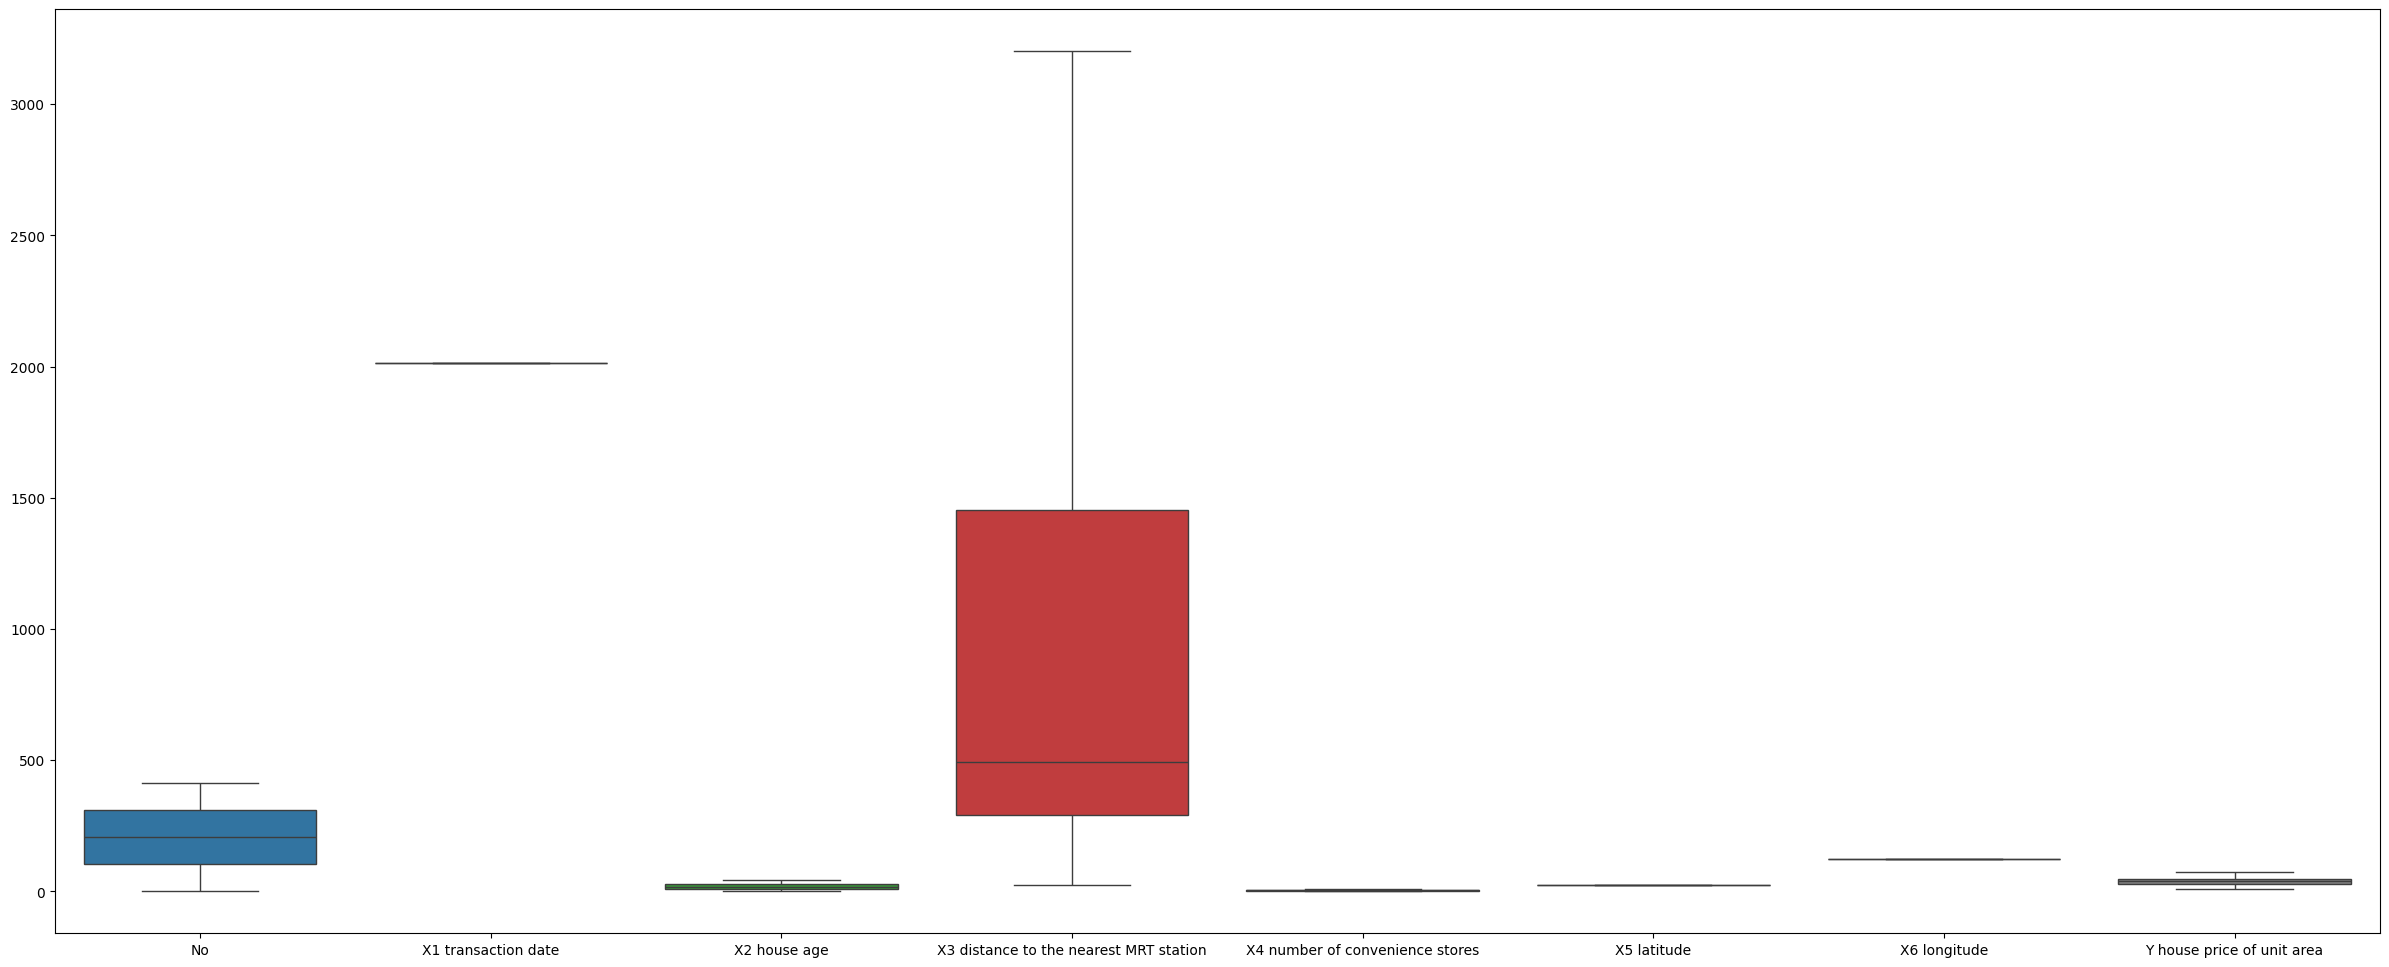

In [8]:
plt.figure(figsize=(30, 12))
sns.boxplot(data)

As you can see, compared to the previous box diagram, we don't have any more data scatter(Outlier).

<Axes: >

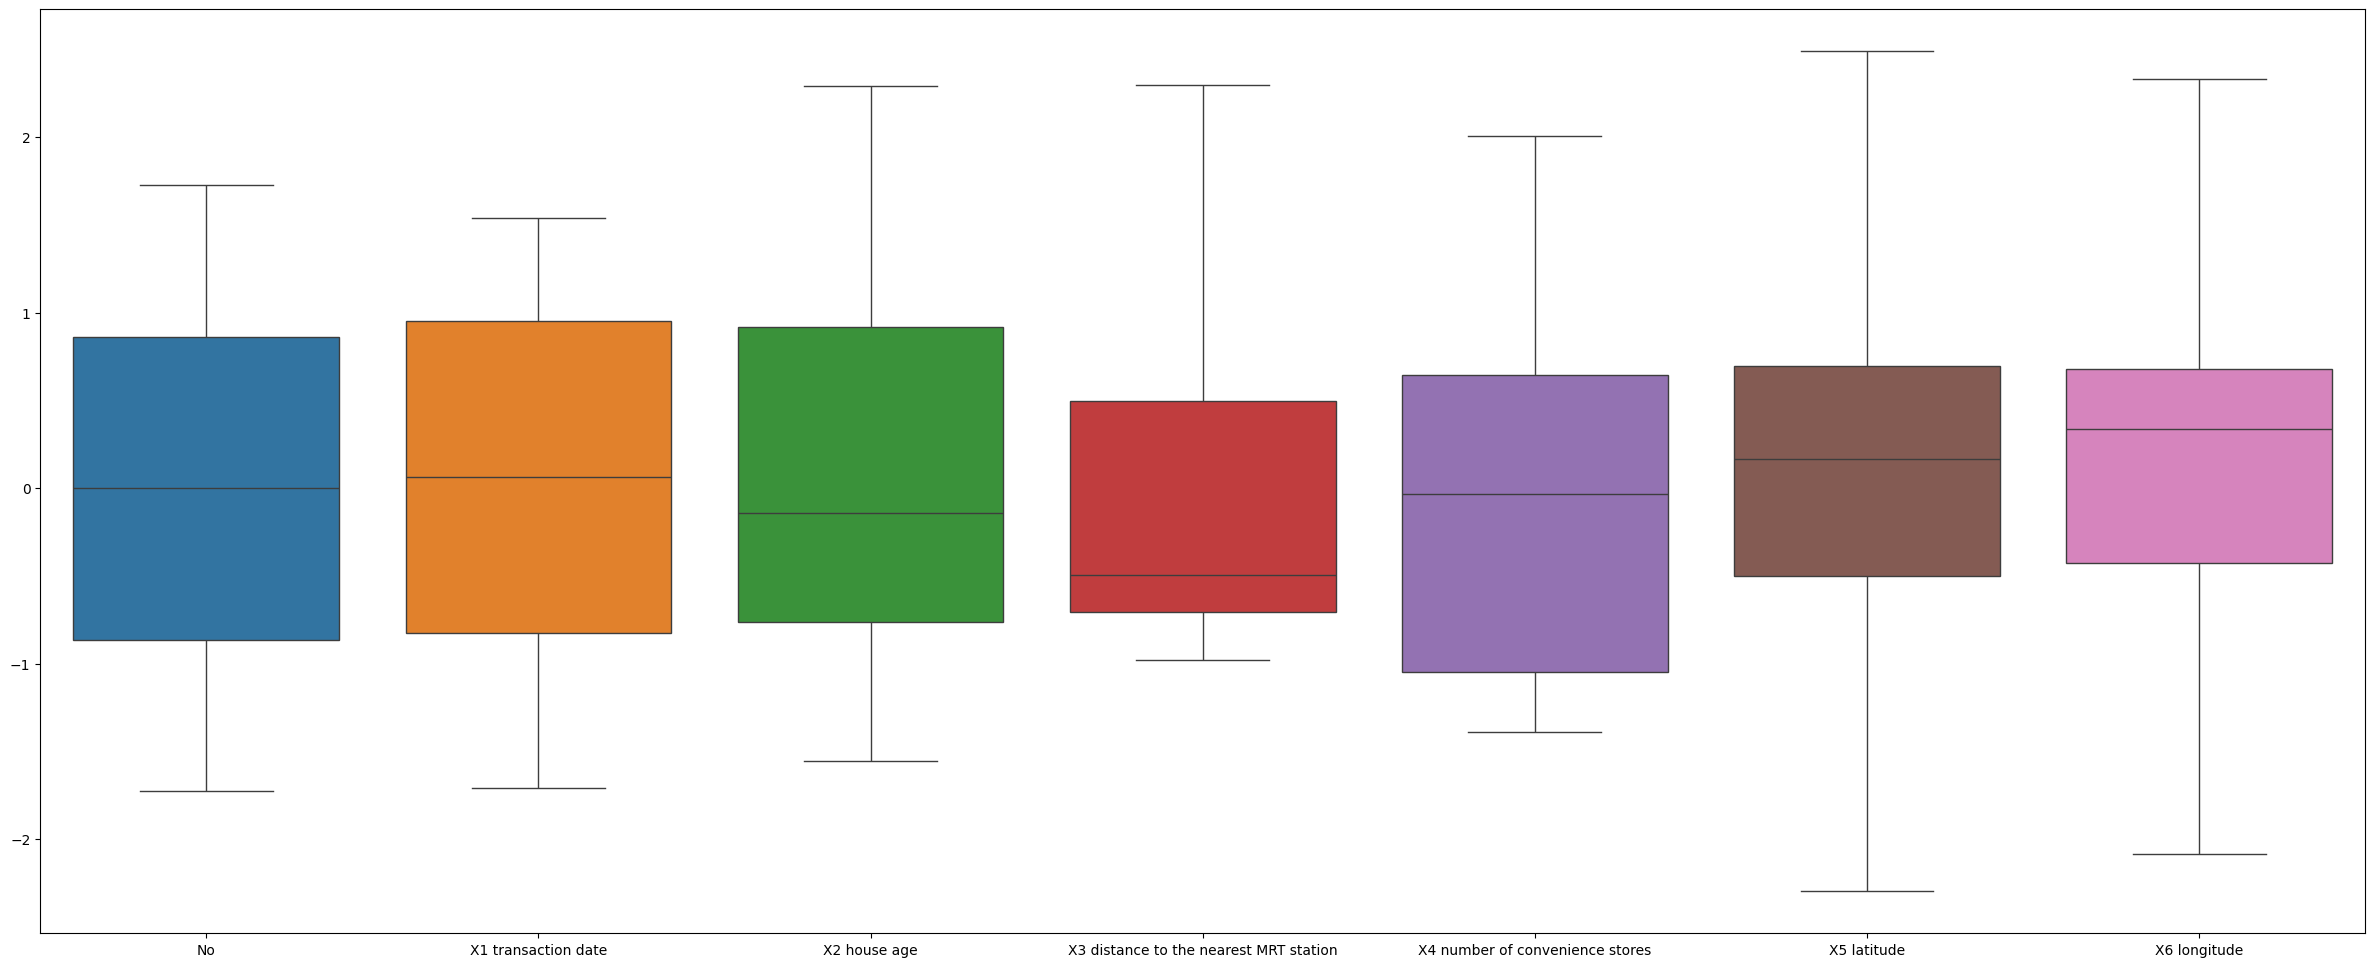

In [9]:
plt.figure(figsize=(30, 12))
sns.boxplot(X)

This is also the effect of the Standard_scaling function on data

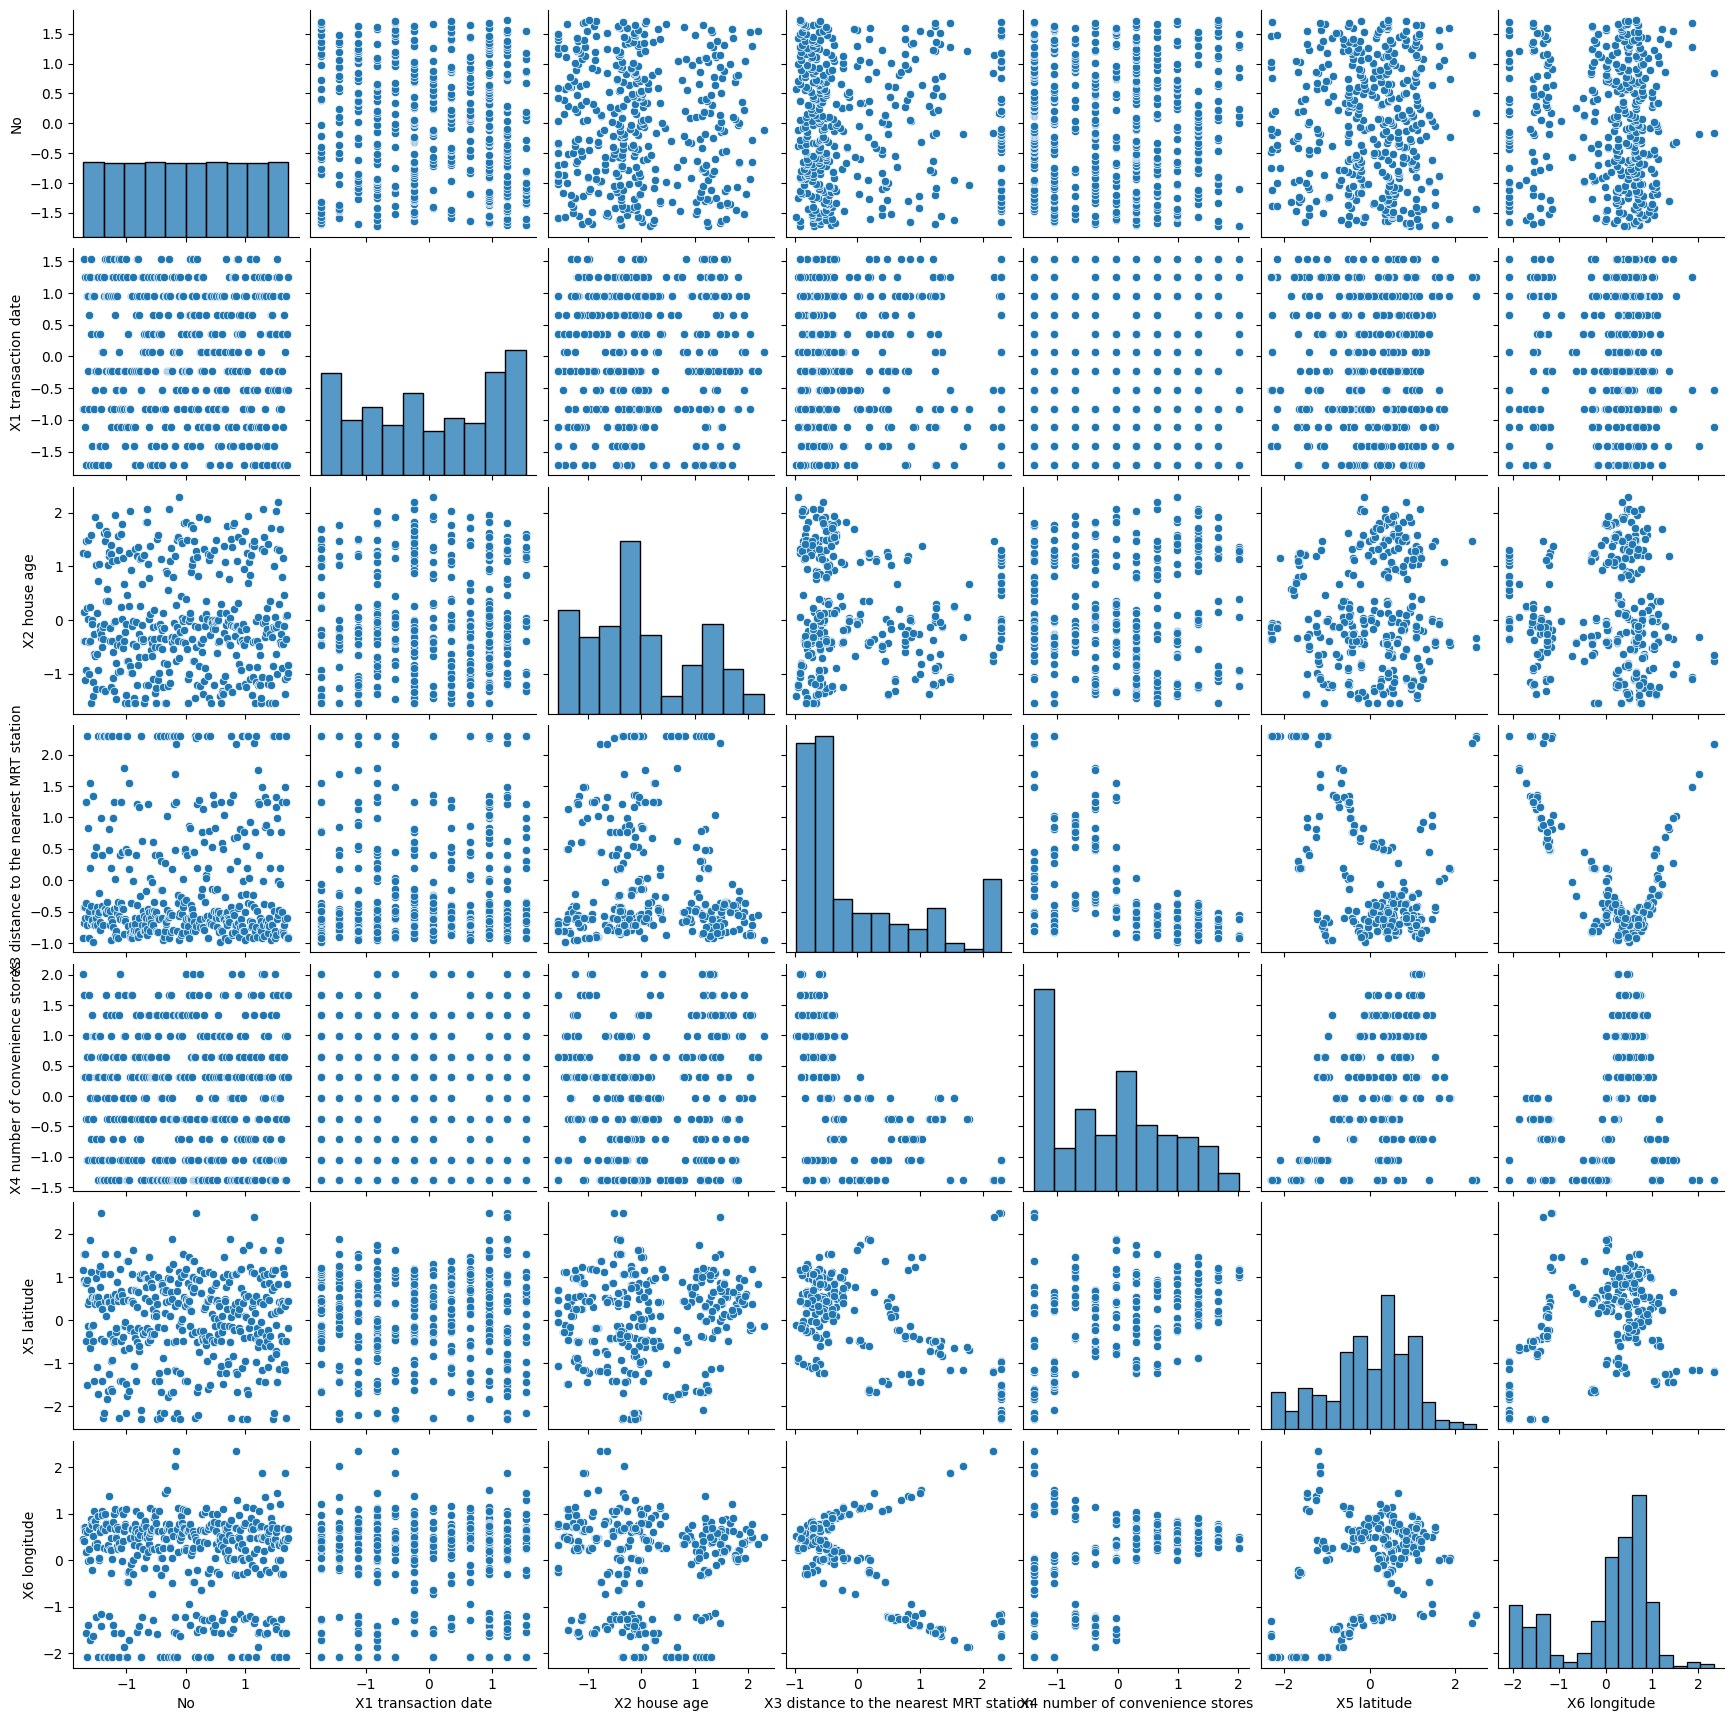

In [10]:
sns.pairplot(X)
plt.show()

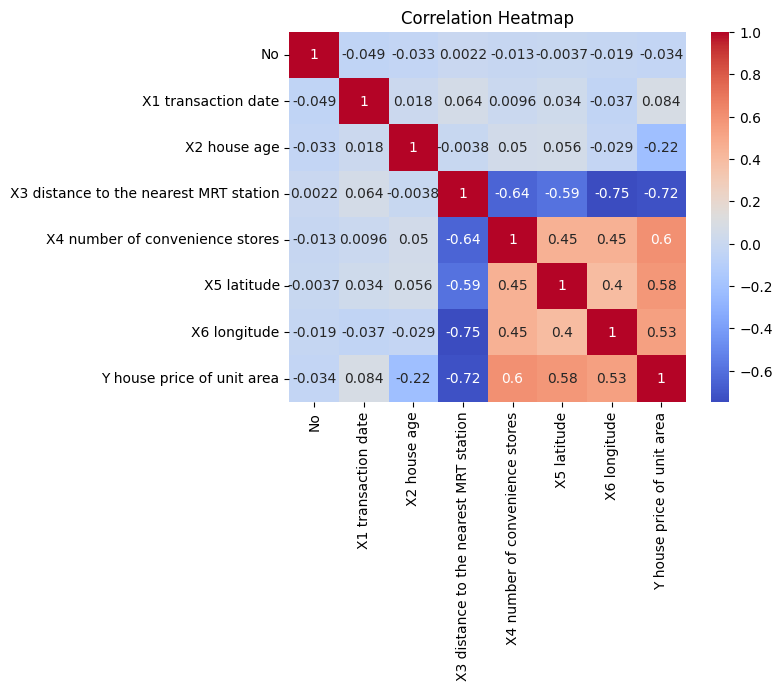

In [11]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Variables that have a higher correlation with the target variable play a greater role in determining the weights.

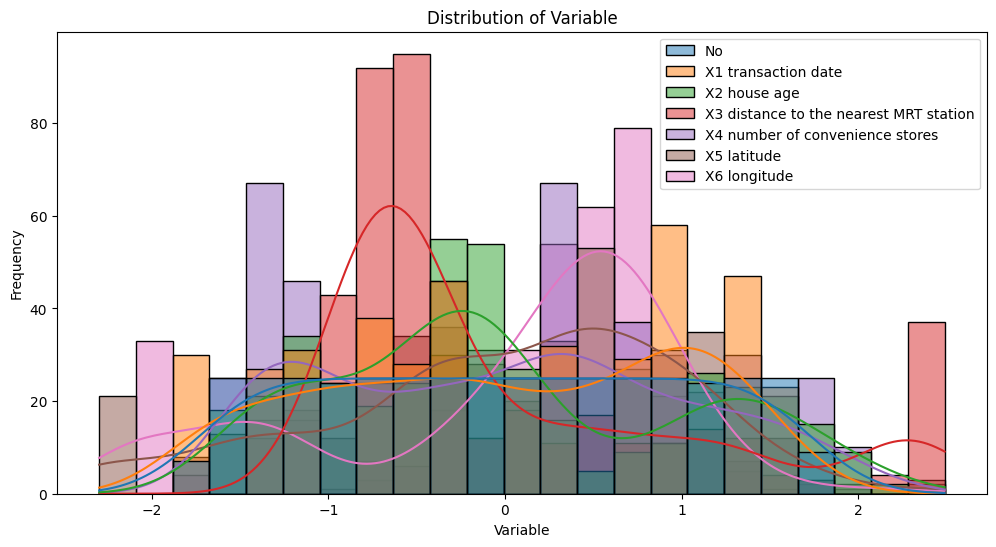

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(X, kde=True)
plt.title('Distribution of Variable')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.show()


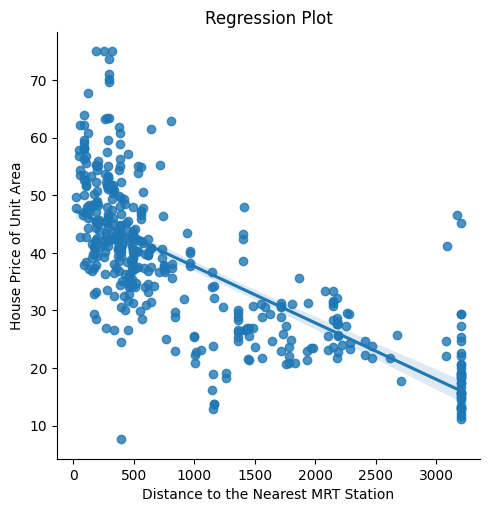

In [13]:
sns.lmplot(x="X3 distance to the nearest MRT station", y="Y house price of unit area", data=data)
plt.title('Regression Plot')
plt.xlabel('Distance to the Nearest MRT Station')
plt.ylabel('House Price of Unit Area')
plt.show()

This graph shows that the further the distance from the house to the station, the lower the price, and the closer it is, the higher the price. It means that these two variables have opposite relationship with each other.

# Part C

In [14]:
median = data['X2 house age'].median()
above = data[data['X2 house age'] > median]
below = data[data['X2 house age'] < median]
avg_above = above['Y house price of unit area'].mean()
avg_below = below['Y house price of unit area'].mean()
std_above = above['Y house price of unit area'].std()
std_below = below['Y house price of unit area'].std()
n_above = len(above)
n_below = len(below)

SEP = np.sqrt(( (n_above -1) * (std_above**2) + (n_below -1) * (std_below**2)) / (n_above + n_below -2))
t = (avg_above - avg_below) / (SEP * np.sqrt(1/n_above + 1/n_below))
free_deg = n_above + n_below -2

p_value = 2 * (1 - (1 - np.abs(t)) ** (free_deg - 1) * (1 + np.abs(t)) / (2 * free_deg))

alpha = 0.05
if p_value < alpha:
    print("YES")
else:
    print("NO")

print("P-value:", p_value)


YES
P-value: -1.5737593992937892e+249


First, the t-statistic is calculated using the difference of means and standard deviation, and then the two-sided p-value is calculated using the t-distribution and adjusted degree of freedom for asymmetric sample sizes. If the p value is less than the significance level (0.05), this indicates a significant difference in the average prices for each area unit.

In [15]:
group = data.groupby('X4 number of convenience stores')['Y house price of unit area'].mean()
mean = data['Y house price of unit area'].mean()
SSB = group.count() * (group - mean)**2
SSW = ((data.groupby('X4 number of convenience stores')['Y house price of unit area'].apply(lambda x: (x - x.mean())**2)).sum())
dfb = len(group) - 1
dfw = len(data) - len(group)
free_deg = len(data) - 1
F = (SSB / dfb) / (SSW / dfw)
F = np.sum(F)
critical_val = 7.815

if F > critical_val:
    print("YES")
else:
    print("NO")

print("F:", F)
print("Critical val:", critical_val)

YES
F: 8.54991949032412
Critical val: 7.815


I have written this code to perform the analysis of variance test to check the significant difference of the average price for each area unit between different categories of the number of convenience stores (available in 'X4 number of convenience stores'). First, I calculated the average price for each category of stores and then performed calculations to calculate the variance between groups and within groups. Finally, I calculated the F statistic and compared it with the significance threshold value. If the value of F is greater than the significance limit, it indicates a significant difference in the mean prices.

In [16]:
cols = pd.crosstab(data["X3 distance to the nearest MRT station"], data["Y house price of unit area"])
cols
expected = np.outer(cols.sum(axis=1), cols.sum(axis=0)) / cols.values.sum()
chi_sq = np.sum((cols - expected)**2 / expected)
chi_sq = chi_sq.sum(axis=0)
free_deg = (cols.shape[0] - 1) * (cols.shape[1] - 1)
critical_val = 7.815 #v=3, alpha=0.95
if chi_sq > critical_val:
    print("YES")
else:
    print("NO")

print("Chi-square:", chi_sq)


YES
Chi-square: 61615.79602469603


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


I used the pandas crosstab function to create a contingency table, where I tabulated the frequencies of occurrences of each combination of values between "X3 distance to the nearest MRT station" and "Y house price of unit area". Then, I calculated the expected frequencies under the null hypothesis of independence using the formula (row total * column total / total observations). After that, I computed the chi-square test statistic by summing the squared differences between observed and expected frequencies divided by expected frequencies. I then summed the chi-square values along the columns and found the degrees of freedom for the chi-square distribution based on the dimensions of the contingency table. Finally, I compared the chi-square statistic with the critical value from the chi-square distribution for a significance level of 0.05 and printed the result. If the chi-square statistic was greater than the critical value, it indicated a significant association between the two variables.

# Part D

In [17]:
correlation = data.corr()['Y house price of unit area'].drop('Y house price of unit area')
corr_variable = correlation.idxmax()
corr_value = correlation.max()
print("Correlation:")
print("\nHighest correlation:")
print("Variable:", corr_variable)
print("Correlation Value:", corr_value)

(correlation)

Correlation:

Highest correlation:
Variable: X4 number of convenience stores
Correlation Value: 0.5988229732920756


No                                       -0.034401
X1 transaction date                       0.084391
X2 house age                             -0.215673
X3 distance to the nearest MRT station   -0.724550
X4 number of convenience stores           0.598823
X5 latitude                               0.576873
X6 longitude                              0.531645
Name: Y house price of unit area, dtype: float64

Exactly like the result obtained from the previous Correlation heatMap.

# Part E

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
X = data.drop(['Y house price of unit area'], axis=1)
y = data['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)
model = LinearRegression()
model.fit(X_train, y_train)
b = model.intercept_
w = model.coef_[0]

print("b:", b)
print("X4 weight:", w)


b: -15795.532049079386
X4 weight: -0.0032824133214555515
